# Hyperparameter Search Experiments - Evolutionary Algorithm TSP

In [4]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
from tsp_evolutionary_algorithm import TSPEvolutionaryAlgorithm
from Reporter import Reporter

In [2]:
# The dataset filenames
datasets = ['tour29.csv', 'tour100.csv', 'tour194.csv', 'tour929.csv']

## Search of prob_l

In [14]:
dataset_idx = 2
file = open('datasets/' + datasets[dataset_idx])
distance_matrix = np.loadtxt(file, delimiter=",")
file.close()

best_fitnesses = []
mean_fitnesses = []
iterations = []
local_search_probabilities = np.arange(0, 1.1, 0.1)

for prob_ls in local_search_probabilities:
    reporter = Reporter(datasets[dataset_idx][:-4] + f'_{iter}')
    ga = TSPEvolutionaryAlgorithm(distance_matrix, lambda_=100, mu=20, k=4,
                                  recombination_probability=0.9,
                                  mutation_probability=0.1,
                                  local_search_probability = prob_ls)
    
    while not ga.converged(): #improvement_criterion=True):
        ga.update()

        # extract results of current generation
        mean_objective = ga.mean_objective
        best_objective = ga.best_objective
        best_solution = ga.best_solution
        time_left = reporter.report(mean_objective,
                                    best_objective,
                                    best_solution)
        if time_left < 0:
            break

    best_fitnesses.append(best_objective)
    mean_fitnesses.append(mean_objective)
    iterations.append(ga.iteration)
    print(f'#{len(best_fitnesses)} converged!')

print(best_solution.route)

Population initialized!
#1 converged!
Population initialized!
#2 converged!
Population initialized!
#3 converged!
Population initialized!
#4 converged!
Population initialized!
#5 converged!
Population initialized!
#6 converged!
Population initialized!
#7 converged!
Population initialized!
#8 converged!
Population initialized!
#9 converged!
Population initialized!
#10 converged!
Population initialized!
#11 converged!
[190, 191, 189, 186, 182, 185, 193, 181, 175, 168, 162, 160, 163, 171, 178, 173, 172, 174, 183, 176, 180, 177, 179, 169, 166, 167, 164, 158, 161, 157, 154, 150, 146, 151, 140, 152, 156, 153, 149, 143, 138, 137, 141, 145, 148, 155, 144, 139, 136, 133, 131, 125, 124, 126, 129, 110, 103, 100, 98, 93, 88, 89, 97, 84, 85, 64, 19, 62, 35, 58, 61, 81, 70, 79, 86, 75, 74, 77, 71, 73, 68, 59, 56, 44, 36, 26, 21, 28, 27, 32, 17, 20, 23, 25, 16, 6, 10, 13, 24, 22, 12, 15, 7, 5, 0, 3, 1, 2, 4, 8, 9, 11, 14, 18, 29, 31, 30, 34, 43, 41, 49, 48, 54, 53, 51, 52, 55, 57, 47, 45, 40, 37, 42,

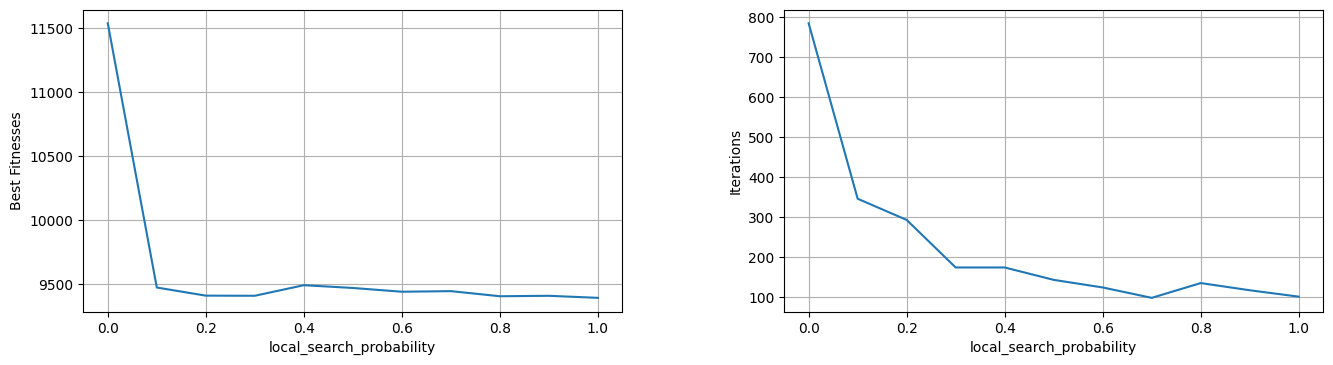

In [32]:
from matplotlib import pyplot as plt

def plot_fitnesses(best_fitnesses, mean_fitnesses, iterations):
    fig = plt.figure(figsize=(16,4), dpi= 100, facecolor='w', edgecolor='k')
    fig.add_subplot(1, 2, 1)
    fig.add_subplot(1, 2, 2)
    #fig.add_subplot(1, 3, 3)
    fig.subplots_adjust(wspace=0.3)
    ax = fig.axes
    labels = ['Best Fitnesses', 'Mean Fitnesses', 'Iterations'][::2]

    for idx in range(len(ax)):
        ax[idx].set_xlabel('local_search_probability')
        ax[idx].set_ylabel(labels[idx])
        ax[idx].grid(True)
        ax[idx].plot(local_search_probabilities, [best_fitnesses, mean_fitnesses, iterations][::2][idx])

    plt.show()
    
""" Plot the histograms """
plot_fitnesses(best_fitnesses, mean_fitnesses, iterations)

## Search for mutation strength

In [ ]:
dataset_idx = 2
file = open('datasets/' + datasets[dataset_idx])
distance_matrix = np.loadtxt(file, delimiter=",")
file.close()

best_fitnesses = []
mutation_strengths = [1, 2, 3, 4, 5, 10, 20, 50]

for ms in mutation_strengths:
    reporter = Reporter(datasets[dataset_idx][:-4] + f'_{iter}')
    ga = TSPEvolutionaryAlgorithm(distance_matrix, lambda_=10, mu=5, k=3,
                                  recombination_probability=0.9,
                                  mutation_probability=1,
                                  local_search_probability=1,
                                  mutation_strength=ms)
    
    while not ga.converged():
        ga.update()

        # extract results of current generation
        mean_objective = ga.mean_objective
        best_objective = ga.best_objective
        best_solution = ga.best_solution
        time_left = reporter.report(mean_objective,
                                    best_objective,
                                    best_solution)
        if time_left < 0:
            break

    best_fitnesses.append(best_objective)
    print(f'#{len(best_fitnesses)} converged!')

print(best_solution.route)

#1 converged!
#2 converged!


In [ ]:
from matplotlib import pyplot as plt

def plot_fitnesses(best_fitnesses, mutation_strengths):
    fig = plt.figure(figsize=(16,4), dpi= 100, facecolor='w', edgecolor='k')
    fig.add_subplot(1, 1, 1)
    ax = fig.axes
    labels = ['Best Fitnesses']

    for idx in range(len(ax)):
        ax[idx].set_xlabel('mutation_strength')
        ax[idx].set_ylabel(labels[idx])
        ax[idx].grid(True)
        ax[idx].plot(mutation_strengths, best_fitnesses)

    plt.show()
    
""" Plot the graph """
plot_fitnesses(best_fitnesses, mutation_strengths)